1) Bug hunt: function input/return mismatch

In [2]:
def describe_double(x):
    return "Double is " + 2*x   # BUG: trying to add str and int -> TypeError

n = 4
print(describe_double(n)) # Python can't concatenate a string and an int; 2*x is a number, so cast or use an f-string.


TypeError: can only concatenate str (not "int") to str

In [3]:
def describe_double(x):
    # use an f-string to safely combine text and numbers
    return f"Double of {x} is {2*x}"

n = 4
print(describe_double(n))

Double of 4 is 8


2) List vs. NumPy behavior confusion

Question (code that runs but gives unintended output):

In [4]:
import numpy as np
a = [1, 2, 3]
b = [10, 20, 30]

ab = np.array(a + b)  # BUG: a + b concatenates lists before array creation
print(ab)
# a + b concatenates Python lists into [1,2,3,10,20,30]. NumPy only sees the already-concatenated list.


[ 1  2  3 10 20 30]


In [ ]:
import numpy as np

a = [1, 2, 3]
b = [10, 20, 30]

# convert to NumPy arrays first, then add them
arr = np.array(a) + np.array(b)
print(arr)


[11 22 33]


3) Read CSV, subset by a logical condition, and count rows

Question: Read HeightWeight-quiz.csv into a DataFrame. Extract rows where Height_Inches > 70. Save to a new DataFrame and print the number of rows extracted.

In [10]:
import pandas as pd

# Step 1: read the CSV using its absolute path
df = pd.read_csv("/Users/pennywang/Documents/GitHub/practice_quiz_2/data_folder/HeightWeight-quiz.csv")

# Step 2: extract subset satisfying logical condition
subset = df[df["Height_Inches"] > 70].copy()

# Step 3: print how many rows satisfy the condition
print("Number of rows where Height_Inches > 70:", len(subset))

# Step 4: (optional) preview first few rows
print(subset.head())


Number of rows where Height_Inches > 70: 3666
    Index  Height_Inches  Weight_Pounds
1       2       71.51521       136.4873
7       8       70.01472       136.4623
15     16       71.09160       139.9975
18     19       71.23033       137.9025
26     27       70.84235       142.4235


4) Write a function returning one of two strings; apply across a column

Question: Write a function that returns "Tall" if height > 70 else "Not Tall". Apply it to the Height_Inches column with .apply() and store in a new column.

In [11]:
import pandas as pd

# Step 1: define the function
def height_to_label(height):
    if height > 70:
        return "Tall"
    else:
        return "Not Tall"

# Step 2: apply the function to the column and store results
df["Height_Label"] = df["Height_Inches"].apply(height_to_label)

# Step 3: (optional) see how many of each label
print(df["Height_Label"].value_counts())

# Step 4: preview the new column
print(df.head())


Height_Label
Not Tall    21334
Tall         3666
Name: count, dtype: int64
   Index  Height_Inches  Weight_Pounds Height_Label
0      1       65.78331       112.9925     Not Tall
1      2       71.51521       136.4873         Tall
2      3       69.39874       153.0269     Not Tall
3      4       68.21660       142.3354     Not Tall
4      5       67.78781       144.2971     Not Tall


5) Randomly assign rows into two groups using a random variable

Question: Add a column "random_var" filled with U[0,1) values. Create two DataFrames:

group_A: random_var < 0.5

group_B: random_var >= 0.5

In [12]:
import pandas as pd
import numpy as np

# Step 1: read your dataset
df = pd.read_csv("/Users/pennywang/Documents/GitHub/practice_quiz_2/data_folder/HeightWeight-quiz.csv")

# Step 2: add random numbers between 0 and 1
np.random.seed(42)        # ensures reproducibility
df["random_var"] = np.random.rand(len(df))

# Step 3: split into two groups
group_A = df[df["random_var"] < 0.5].copy()
group_B = df[df["random_var"] >= 0.5].copy()

# Step 4: print sizes
print("Group A size:", len(group_A))
print("Group B size:", len(group_B))

# optional: preview
print(group_A.head())


Group A size: 12438
Group B size: 12562
    Index  Height_Inches  Weight_Pounds  random_var
0       1       65.78331       112.9925    0.374540
4       5       67.78781       144.2971    0.156019
5       6       68.69784       123.3024    0.155995
6       7       69.80204       141.4947    0.058084
10     11       66.48769       127.4516    0.020584


🎨 Question 6 — Make two scatter plots side-by-side

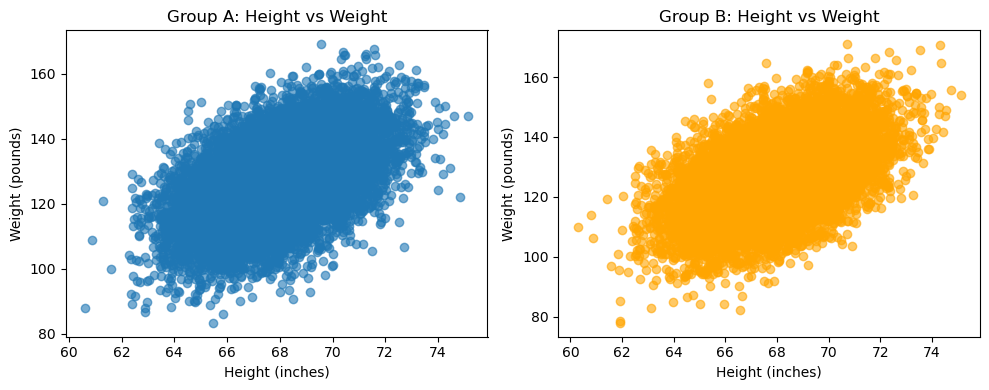

In [13]:
import matplotlib.pyplot as plt

# Step 1: create a 1×2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Step 2: scatter plot for Group A
axes[0].scatter(group_A["Height_Inches"], group_A["Weight_Pounds"], alpha=0.6)
axes[0].set_title("Group A: Height vs Weight")
axes[0].set_xlabel("Height (inches)")
axes[0].set_ylabel("Weight (pounds)")

# Step 3: scatter plot for Group B
axes[1].scatter(group_B["Height_Inches"], group_B["Weight_Pounds"], alpha=0.6, color="orange")
axes[1].set_title("Group B: Height vs Weight")
axes[1].set_xlabel("Height (inches)")
axes[1].set_ylabel("Weight (pounds)")

# Step 4: adjust spacing and show
plt.tight_layout()
plt.show()
